## Imports and utils

In [1]:
import sys
sys.path.append("..") #(This is lazy. Don't do this.)


from wavNN.train_model import TrainingLoop
from wavNN.models.wavMLP import *
from wavNN.models.voting_wavMLP import * 
from wavNN.data_generators.mnist_generator import *

import torch

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def plot_experiment_history(history, history_name): 
    train_loss = np.asarray([history[i]['train_loss'] for i in history])
    train_loss_std = np.std(train_loss, axis=0)
    train_loss_mean = np.mean(train_loss, axis=0)

    val_loss = np.asarray([history[i]['val_loss'] for i in history])
    val_std = np.std(val_loss, axis=0)
    val_mean = np.mean(val_loss, axis=0)

    plt.errorbar(range(len(train_loss_mean)), train_loss_mean, yerr=train_loss_std, label="Train", alpha=.5)
    plt.errorbar(range(len(train_loss_mean)), val_mean, yerr=val_std, label="Validation", alpha=.5)

    plt.title(history_name)
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

    train_ac = np.asarray([history[i]['train_accuracy'] for i in history])
    train_ac_std = np.std(train_ac, axis=0)
    train_ac_mean = np.mean(train_ac, axis=0)

    val_ac = np.asarray([history[i]['val_accuracy'] for i in history])
    val_std = np.std(val_ac, axis=0)
    val_mean = np.mean(val_ac, axis=0)

    plt.errorbar(range(len(train_ac_mean)), train_ac_mean, yerr=train_ac_std, label="Train", alpha=.5)
    plt.errorbar(range(len(train_ac_mean)), val_mean, yerr=val_std, label="Validation", alpha=.5)

    plt.legend()
    plt.title(history_name)
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.show()

## The single level wavNN method 

This is a single level of the wavelet (namely, level 2). Compared against the a single level vanilla NN with a single hidden layer. 

In [2]:
# Test n iterations of wavNN history

all_wavNN_history = {}
num_tests = 10

model_params = {
        "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
        "level": 2,
        "tail": True,
    }

data_params = {"sample_size": [4000, 2000, 2000], "split": True}


for iteration in range(num_tests): 

    training = TrainingLoop(
        model_class=WavMLP,
        model_params=model_params,
        data_class=NMISTGenerator,
        data_params=data_params,
        optimizer=torch.optim.SGD,
        loss=torch.nn.CrossEntropyLoss,
        epochs=80,
    )
    training()
    all_wavNN_history[iteration] = training.history

/Users/maggiev-local/repo/wavNN/notebooks/../wavNN/models/wavMLP.py:63: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  self.wavelet = lambda x: torch.Tensor(pywt.wavedec2(x, "db1")[level])


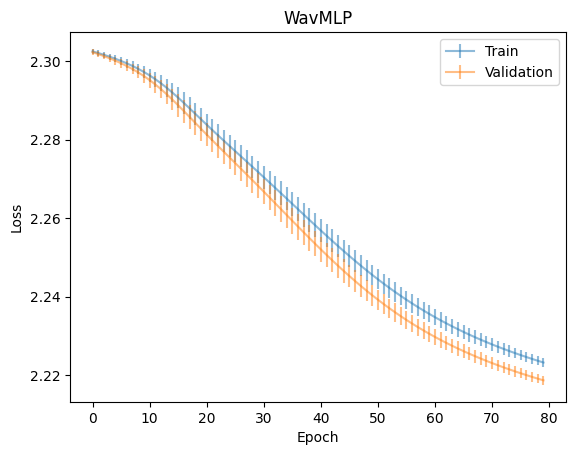

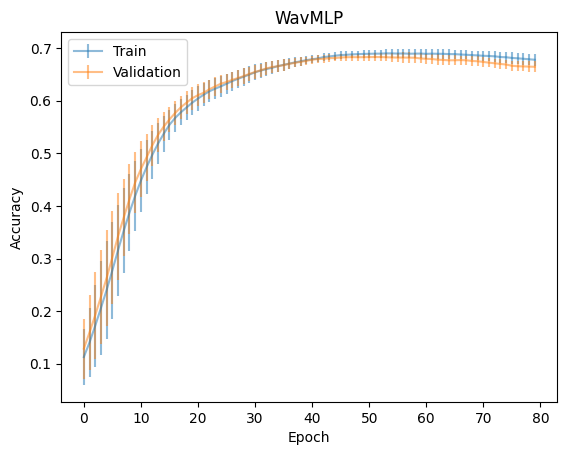

In [10]:
plot_experiment_history(all_wavNN_history, "WavMLP")

In [6]:
# Test 30 iterations of wavNN history

all_vanilla_history = {}
num_tests = 5

model_params = {
        "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
        "tail": True,
    }

data_params = {"sample_size": [4000, 2000, 2000], "split": True}


for iteration in range(num_tests): 

    training = TrainingLoop(
        model_class=VanillaMLP,
        model_params=model_params,
        data_class=NMISTGenerator,
        data_params=data_params,
        optimizer=torch.optim.SGD,
        loss=torch.nn.CrossEntropyLoss,
        epochs=80,
    )
    training()
    all_vanilla_history[iteration] = training.history

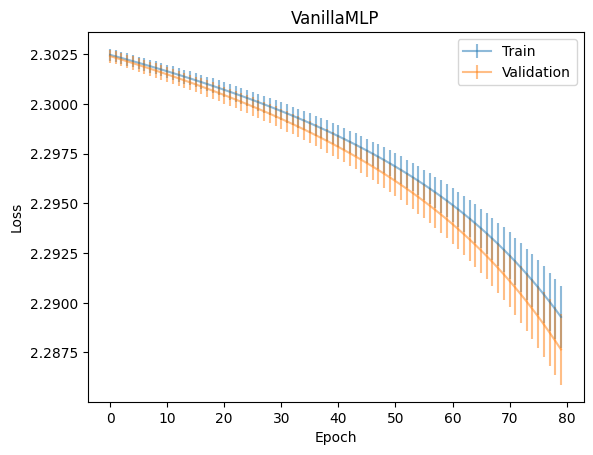

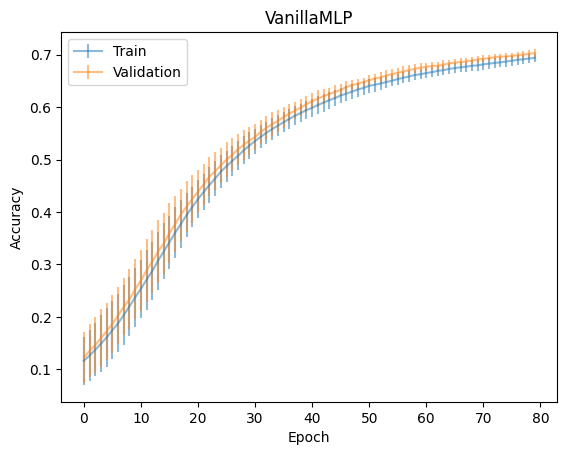

In [11]:
plot_experiment_history(all_vanilla_history, "VanillaMLP")

In [16]:
# Timing tests: 
    # Time per epoch 
    # Time per 10 epoch 
import time 

timing_history = {
    "vanilla_epoch":[],
    "vanilla_10_epoch":[],
    "wav_epoch":[],
    "wav_10_epoch":[]
}

data_params = {"sample_size": [4000, 2000, 2000], "split": True}

for exp in range(10): 
    # vanilla 
    vanilla_model_params = {
        "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
        "tail": True,
    }
    
    training = TrainingLoop(
        model_class=VanillaMLP,
        model_params=vanilla_model_params,
        data_class=NMISTGenerator,
        data_params=data_params,
        optimizer=torch.optim.SGD,
        loss=torch.nn.CrossEntropyLoss,
        epochs=1,
    )
    
    start = time.time()
    training()
    timing_history["vanilla_epoch"].append(time.time()-start)
    
    
    training = TrainingLoop(
        model_class=VanillaMLP,
        model_params=vanilla_model_params,
        data_class=NMISTGenerator,
        data_params=data_params,
        optimizer=torch.optim.SGD,
        loss=torch.nn.CrossEntropyLoss,
        epochs=10,
    )
    
    start = time.time() 
    training()
    timing_history["vanilla_10_epoch"].append(time.time()-start)
    
    wav_model_params = {
            "in_channels": 28,
            "hidden_size": 256,
            "out_channels": 10,
            "level": 2,
            "tail": True,
        }
    training = TrainingLoop(
        model_class=WavMLP,
        model_params=wav_model_params,
        data_class=NMISTGenerator,
        data_params=data_params,
        optimizer=torch.optim.SGD,
        loss=torch.nn.CrossEntropyLoss,
        epochs=1,
    )
    
    start = time.time() 
    training()
    timing_history["wav_epoch"].append(time.time()-start)
    
    training = TrainingLoop(
        model_class=WavMLP,
        model_params=wav_model_params,
        data_class=NMISTGenerator,
        data_params=data_params,
        optimizer=torch.optim.SGD,
        loss=torch.nn.CrossEntropyLoss,
        epochs=10,
    )
    
    start = time.time()
    training()
    timing_history["wav_10_epoch"].append(time.time()-start)

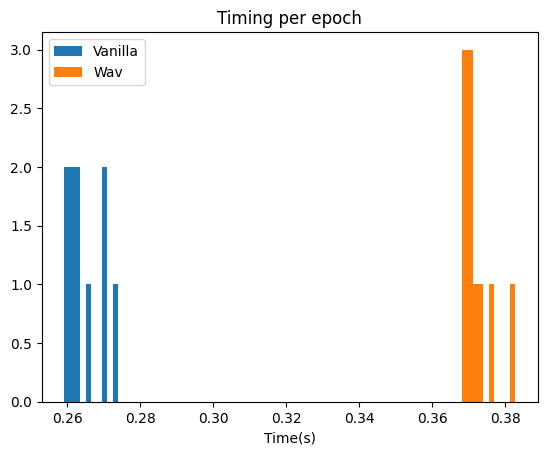

In [21]:
plt.hist(timing_history["vanilla_epoch"], label='Vanilla')
plt.hist(timing_history['wav_epoch'], label='Wav')
plt.title("Timing per epoch")
plt.xlabel("Time(s)")
plt.legend()
plt.show()

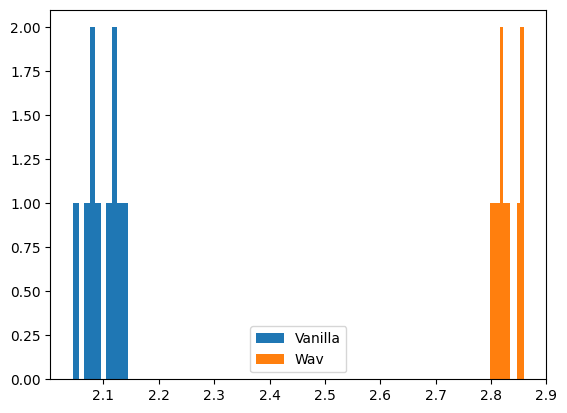

In [19]:
plt.hist(timing_history["vanilla_10_epoch"], label='Vanilla')
plt.hist(timing_history['wav_10_epoch'], label='Wav')
plt.legend()
plt.show()

In [23]:
vanilla_model = VanillaMLP(**{
        "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
        "tail": True,
    })
total_vanilla_params = sum(p.numel() for p in vanilla_model.parameters() if p.requires_grad)

wav_model = WavMLP(**{
            "in_channels": 28,
            "hidden_size": 256,
            "out_channels": 10,
            "level": 2,
            "tail": True,
        })
total_wav_params = sum(p.numel() for p in wav_model.parameters() if p.requires_grad)

print(total_vanilla_params)
print(total_wav_params)

203530
20746


## Voting wavNN 

This is just a whole bunch of the single level wavNN's stacked onto each other and voting on the outcome. 
It can be used the same way as any other voting classifier.

In [7]:
tied_model_params = {
    "in_channels":28,
    "hidden_sizes":256,
    "out_channels":10, 
    "voting_method":"soft", 
    "tail":True

}

tied_wavNN_history = {}
num_tests = 5


data_params = {"sample_size": [4000, 2000, 2000], "split": True}
optimizer_config = {
     "lr": 0.1, 
     "momentum":False
}

for iteration in range(num_tests): 

    training = TrainingLoop(
        model_class=VotingMultiWavMLP,
        model_params=tied_model_params,
        data_class=NMISTGenerator,
        data_params=data_params,        
        loss=torch.nn.CrossEntropyLoss,
        epochs=80,
        optimizer_class=torch.optim.SGD, 
        optimizer_config=optimizer_config,
        tied_model=True
    )
    training()
    tied_wavNN_history[iteration] = training.history


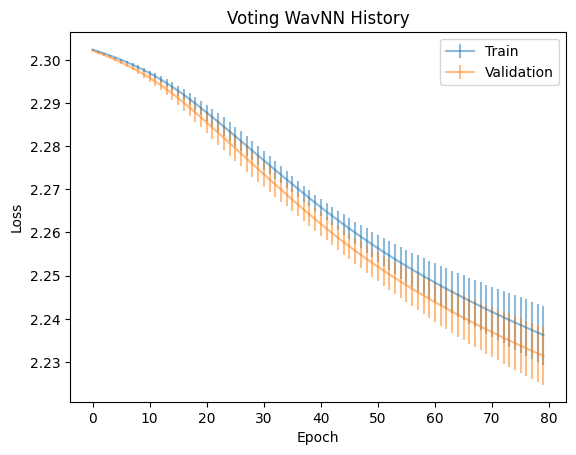

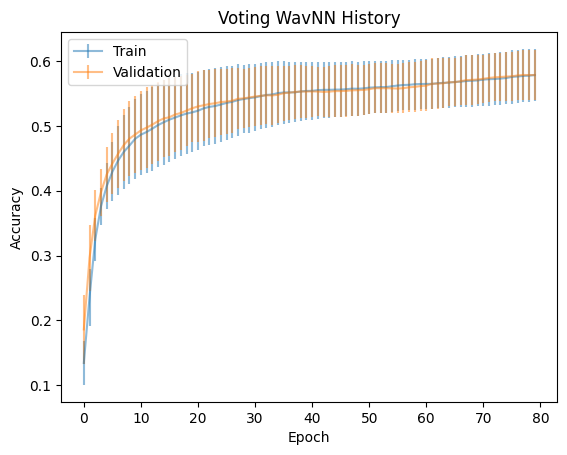

In [8]:
plot_experiment_history(tied_wavNN_history, "Voting WavNN History")

# So are these just harder to train? 
# Makes sense, they're larger models, but it may be that my training scheme is not well suited for them 
# More traditional ensemble methods may do it well. 

# Could be we need a more complicated dataset 
# I can't be sure we're not memorizing.